# DKI Jakarta

**The Special Capital Region of Jakarta (DKI Jakarta)** is the national capital and the largest city in Indonesia. Jakarta is the only city in Indonesia that has provincial-level status. Jakarta is located on the northwest coast of Java Island. In the past, several names were known, including Sunda Kelapa, Jayakarta, and Batavia. Internationally, Jakarta also has the nickname J-Town, or more popularly “The Big Durian” because of the urban style that is comparable to New York City (Big Apple) in Indonesia.

![Jakarta](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Jakarta_Pictures-1.jpg/314px-Jakarta_Pictures-1.jpg) *Source: Wikipedia*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-sushi-restaurant-around-jakarta-area/Noodle.csv
/kaggle/input/pizza-sushi-restaurant-around-jakarta-area/Sushi.csv
/kaggle/input/pizza-sushi-restaurant-around-jakarta-area/Pizza Around Jakarta Area.csv


## Read data

In [2]:
noodle = pd.read_csv('../input/pizza-sushi-restaurant-around-jakarta-area/Noodle.csv')
pizza = pd.read_csv('../input/pizza-sushi-restaurant-around-jakarta-area/Pizza Around Jakarta Area.csv')
sushi = pd.read_csv('../input/pizza-sushi-restaurant-around-jakarta-area/Sushi.csv')

In [3]:
print(noodle.head())
noodle = noodle.drop_duplicates()
print(noodle.info())

                               rest_name                     rest_zone  \
0                            Noodle King  Lotte Shopping Avenue, Karet   
1                       Legend of Noodle                      Senopati   
2              Umaramu Indonesian Noodle          Menteng Huis, Cikini   
3  Jjang Korean Noodle, Grill, & Chikin’                      Senopati   
4                          Pò Noodle Bar                      Senopati   

   rating          review                                       rest_address  \
0     4.3    (709 Ulasan)  Lotte Shopping Avenue, Lantai 3, Jl. Prof Dr S...   
1     4.6  (1,457 Ulasan)             Jl. Senopati No. 81, Senopati, Jakarta   
2     4.0     (89 Ulasan)  Menteng Huis, Lantai 2, Jl. Cikini Raya No. 2 ...   
3     4.2    (704 Ulasan)    Jl. Wolter Monginsidi No. 37, Senopati, Jakarta   
4     4.2    (206 Ulasan)  Jl. Prof. Joko Sutono, Blok SH No. 7B, Senopat...   

   rest_type                rest_cost  \
0      Korea  Harga untuk 2:Rp250

In [4]:
print(pizza.head())
pizza = pizza.drop_duplicates()
print(pizza.info())

                1.rest_name                               2.rest_zone  \
0             Pizza Marzano  Lippo Mall Puri @ St. Moritz, Puri Indah   
1                 Pizza Hut               Puri Indah Mall, Puri Indah   
2  Pizza e Birra Sports Bar               Puri Indah Mall, Puri Indah   
3                       PHD                                Puri Indah   
4               Pezzo Pizza  Lippo Mall Puri @ St. Moritz, Puri Indah   

   3.rating      4.review                                     5.rest_address  \
0       4.1  (154 Ulasan)  Lippo Mall Puri @ The St. Moritz, Lantai Lower...   
1       3.9   (95 Ulasan)  Puri Indah Mall, Lantai 1, Jl. Puri Indah Raya...   
2       3.8  (175 Ulasan)  Puri Indah Mall, Lantai Ground, Jl. Puri Indah...   
3       3.4    (7 Ulasan)               Jl Pesanggrahan, Puri Indah, Jakarta   
4       3.0   (33 Ulasan)  Lippo Mall Puri @ The St. Moritz, Lantai Lower...   

      6.rest_type              7.rest_cost  \
0    Pizza, Itali  Harga untuk 2:R

In [5]:
print(sushi.head())
sushi = sushi.drop_duplicates()
print(sushi.info())

                         rest_name                           rest_zone  \
0                   3 Wise Monkeys                            Senopati   
1                    Kintaro Sushi                            Senopati   
2                    Okinawa Sushi                            Senopati   
3                        Sushi Go!         Central Park, Tanjung Duren   
4  OKU - Hotel Indonesia Kempinski  Hotel Indonesia Kempinski, Thamrin   

   rating          review                                       rest_address  \
0     4.2  (2,088 Ulasan)             Jl. Senopati No. 46, Senopati, Jakarta   
1     4.7  (3,279 Ulasan)                Jl. Suryo No. 20, Senopati, Jakarta   
2     4.5  (1,312 Ulasan)                Jl. Suryo No. 28, Senopati, Jakarta   
3     4.4    (412 Ulasan)  Central Park, Lantai Lower Ground, Jl. Letjen ...   
4     4.9    (931 Ulasan)  Hotel Indonesia Kempinski, Jl. M. H. Thamrin, ...   

       rest_type                rest_cost  \
0  Jepang, Sushi  Harga untuk

## Restaurant Location

Looking for many restaurants in Jakarta and around.

Text(0.5, 87.0, 'Location')

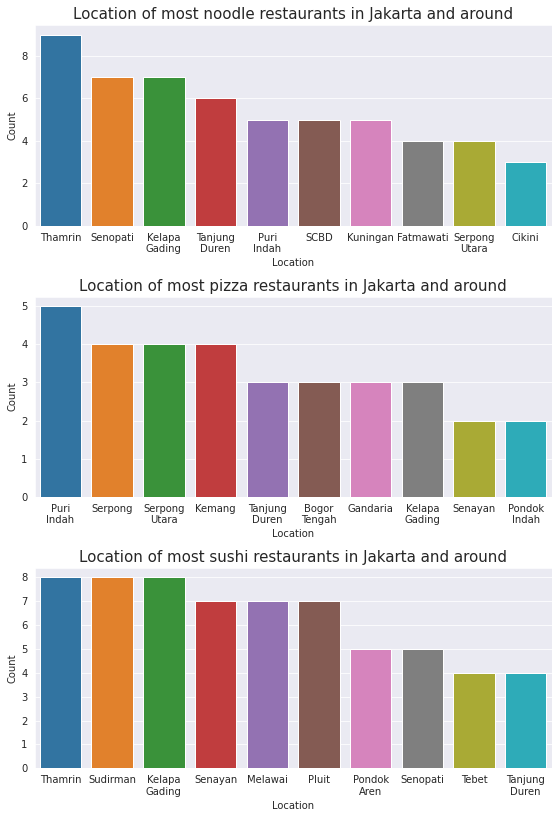

In [6]:
#Lokasi
noodle['rest_zone'] = noodle['rest_zone'].map(lambda x: x.split(", ")[-1]).map(lambda x: x.replace(" ", "\n"))
noodle_loc = noodle.groupby('rest_zone')['rest_name'].count().sort_values(ascending=False)
noodle_loc = pd.DataFrame(data = noodle_loc).reset_index().head(10)

pizza['2.rest_zone'] = pizza['2.rest_zone'].map(lambda x: x.split(", ")[-1]).map(lambda x: x.replace(" ", "\n"))
pizza_loc = pizza.groupby('2.rest_zone')['1.rest_name'].count().sort_values(ascending=False)
pizza_loc = pd.DataFrame(data = pizza_loc).reset_index().head(10)

sushi['rest_zone'] = sushi['rest_zone'].map(lambda x: x.split(", ")[-1]).map(lambda x: x.replace(" ", "\n"))
sushi_loc = sushi.groupby('rest_zone')['rest_name'].count().sort_values(ascending=False)
sushi_loc = pd.DataFrame(data = sushi_loc).reset_index().head(10)

fig, ax = plt.subplots(3,1,figsize=(9,12))
fig.tight_layout(pad=5)
sns.barplot(ax=ax[0], data=noodle_loc, y=noodle_loc['rest_name'], x=noodle_loc['rest_zone'])
ax[0].set_title("Location of most noodle restaurants in Jakarta and around", fontsize=15)
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Location")

sns.barplot(ax=ax[1], data=pizza_loc, y=pizza_loc['1.rest_name'], x=pizza_loc['2.rest_zone'])
ax[1].set_title("Location of most pizza restaurants in Jakarta and around", fontsize=15)
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Location")

sns.barplot(ax=ax[2], data=sushi_loc, y=sushi_loc['rest_name'], x=sushi_loc['rest_zone'])
ax[2].set_title("Location of most sushi restaurants in Jakarta and around", fontsize=15)
ax[2].set_ylabel("Count")
ax[2].set_xlabel("Location")

Because there are many sushi restaurants in Jakarta, I will analyze the data from the sushi restaurant dataset.

## Sushi Restaurant in Jakarta and around

In [7]:
sushi['rest_zone'].unique()

array(['Senopati', 'Tanjung\nDuren', 'Thamrin', 'Bekasi\nUtara',
       'Sudirman', 'Serpong\nUtara', 'Pluit', 'Pondok\nIndah', 'Cikini',
       'Melawai', 'Kemang', 'Pondok\nAren', 'Tebet', 'Serpong',
       'Puri\nIndah', 'Kelapa\nGading', 'Senayan', 'Dharmawangsa',
       'Bekasi\nSelatan', 'Kuningan', 'Bogor\nTimur', 'Cengkareng',
       'Blok\nM', 'Bintaro', 'Bogor\nTengah', 'Pantai\nIndah\nKapuk',
       'Pecenongan', 'Sawah\nBesar', 'SCBD', 'Jatinegara', 'Meruya',
       'Cakung', 'Kramat\nJati', 'Karet', 'Cinere', 'Kalibata',
       'Kec.\nTangerang', 'Beji', 'Cilandak', 'Pancoran\nMas',
       'Fatmawati', 'Mampang\nPrapatan', 'Lebak\nBulus', 'Cibubur',
       'Ciputat', 'Daan\nMogot', 'Penjaringan', 'Ciledug', 'Cijantung',
       'Cibodas', 'Pondok\nBambu', 'Taman\nMini', 'Pasar\nMinggu',
       'Bogor\nUtara', 'Sukmajaya', 'Rawalumbu', 'Kemanggisan'],
      dtype=object)

## Rating (Sushi Restaurant)
Groups of sushi restaurants by rating.

In [8]:
#Rating
print("Highest Ranking Sushi Restaurant: ", sushi["rating"].max())
print("Lowest Ranking Sushi Restaurant: ", sushi["rating"].min())

Highest Ranking Sushi Restaurant:  4.9
Lowest Ranking Sushi Restaurant:  2.2


In [9]:
sushi_star = sushi.loc[:,['rest_name', 'rest_zone', 'rating','rest_cost']]
sushi_star['rest_zone'] = sushi_star['rest_zone'].map(lambda x: x.replace("\n", " "))
sushi_star_new = sushi_star.copy()
sushi_star.head()

,rest_name,rest_zone,rating,rest_cost
0,3 Wise Monkeys,Senopati,4.2,Harga untuk 2:Rp450.000
1,Kintaro Sushi,Senopati,4.7,Harga untuk 2:Rp400.000
2,Okinawa Sushi,Senopati,4.5,Harga untuk 2:Rp400.000
3,Sushi Go!,Tanjung Duren,4.4,Harga untuk 2:Rp100.000
4,OKU - Hotel Indonesia Kempinski,Thamrin,4.9,Harga untuk 2:Rp900.000


In [10]:
def grup(star):
    if star >= 4.6 and star <= 5.0:
        star = "4.6 - 5.0"
    elif star >= 4.1 and star <= 4.5:
        star = "4.1 - 4.5"
    elif star >= 3.6 and star <= 4.0:
        star = "3.6 - 4.0"
    elif star >= 3.1 and star <= 3.5:
        star = "3.1 - 3.5"
    elif star >= 2.6 and star <= 3.0:
        star = "2.6 - 3.0"
    elif star >= 2.1 and star <= 2.5:
        star = "2.1 - 2.5"
    else:
        star = "None"
    
    return star

sushi_star['rating'] = sushi_star['rating'].apply(lambda x: grup(x))
sushi_star_group = pd.DataFrame(data = sushi_star)

3.6 - 4.0    47
4.1 - 4.5    42
3.1 - 3.5    26
2.6 - 3.0    13
4.6 - 5.0     6
2.1 - 2.5     3
Name: rating, dtype: int64


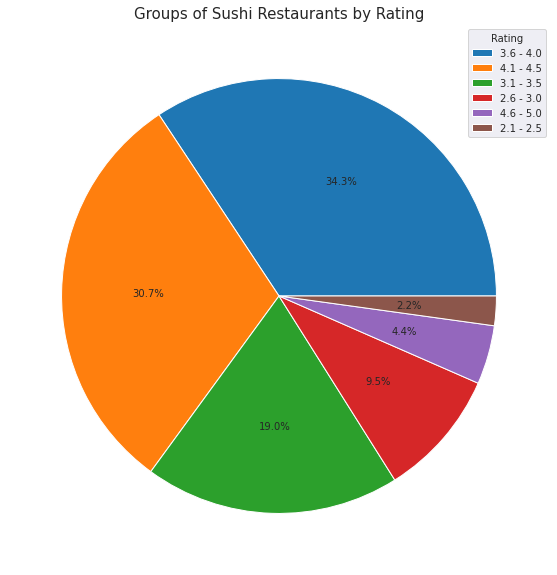

In [11]:
data1 = sushi_star_group['rating'].value_counts()
print(data1.head(10))
fig, ax = plt.subplots(figsize=(15,10))
ax.pie(data1, autopct='%1.1f%%')
ax.set_title('Groups of Sushi Restaurants by Rating', fontsize=15)
ax.legend(['3.6 - 4.0','4.1 - 4.5','3.1 - 3.5',
           '2.6 - 3.0','4.6 - 5.0','2.1 - 2.5'],
          loc='upper right', 
          title='Rating')

Text(0.5, 0, 'Rating')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12459 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12455 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12459 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12455 missing from current font.
  font.set_text

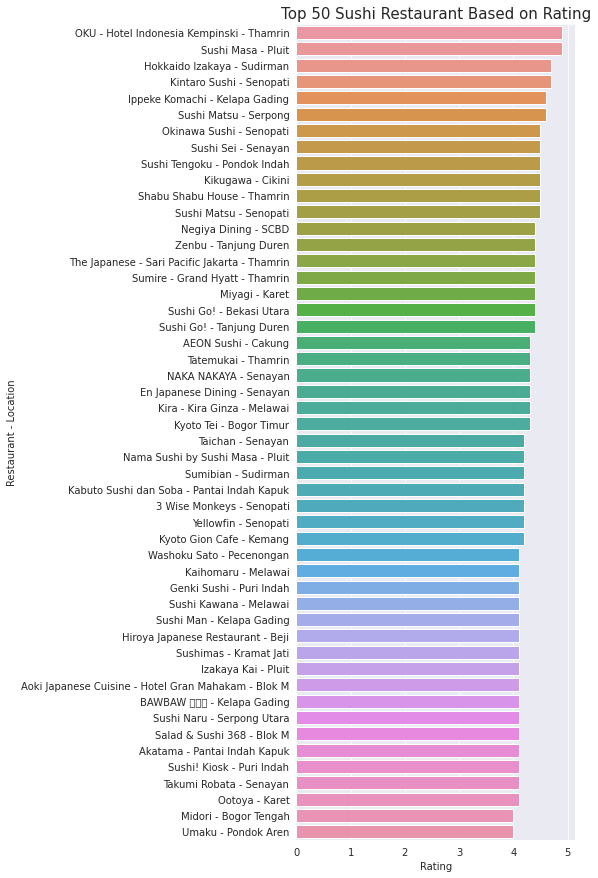

In [12]:
data2 = sushi_star_new.sort_values(by='rating', ascending=False).head(50)
data2['loc_area'] = data2['rest_name'] + " - " + data2['rest_zone']
fig, ax = plt.subplots(figsize=(5,15))
sns.barplot(data = data2, x=data2['rating'], y=data2['loc_area'])
ax.set_title('Top 50 Sushi Restaurant Based on Rating', fontsize=15)
ax.set_ylabel('Restaurant - Location')
ax.set_xlabel('Rating')

## Price (Sushi Restaurant)

Looking for the highest and lowest price sushi restaurants.

In [13]:
sushi_star_new['rest_cost'] = sushi['rest_cost'].apply(lambda x: x.split("Rp")[-1].replace('.',''))
sushi_star_new['rest_cost'] = sushi_star_new['rest_cost'].astype('int')
sushi_star_new['rest_cost'] = sushi_star_new['rest_cost'].apply(lambda x: x / 2)
sushi_star_new['loc_area'] = sushi_star_new['rest_name'] + " - " + sushi_star_new['rest_zone']
sushi_star_new.head()

,rest_name,rest_zone,rating,rest_cost,loc_area
0,3 Wise Monkeys,Senopati,4.2,225000.0,3 Wise Monkeys - Senopati
1,Kintaro Sushi,Senopati,4.7,200000.0,Kintaro Sushi - Senopati
2,Okinawa Sushi,Senopati,4.5,200000.0,Okinawa Sushi - Senopati
3,Sushi Go!,Tanjung Duren,4.4,50000.0,Sushi Go! - Tanjung Duren
4,OKU - Hotel Indonesia Kempinski,Thamrin,4.9,450000.0,OKU - Hotel Indonesia Kempinski - Thamrin


In [14]:
print("Highest Sushi Price: Rp", sushi_star_new.rest_cost.max())
print("Lowest Sushi Price: Rp", sushi_star_new.rest_cost.min())

Highest Sushi Price: Rp 1750000.0
Lowest Sushi Price: Rp 25000.0


* Rp 1750000 = USD $124,00

* Rp 25000 = USD $1,77

Text(0.5, 0, 'Price (Rupiah) (1 x 1000000)')

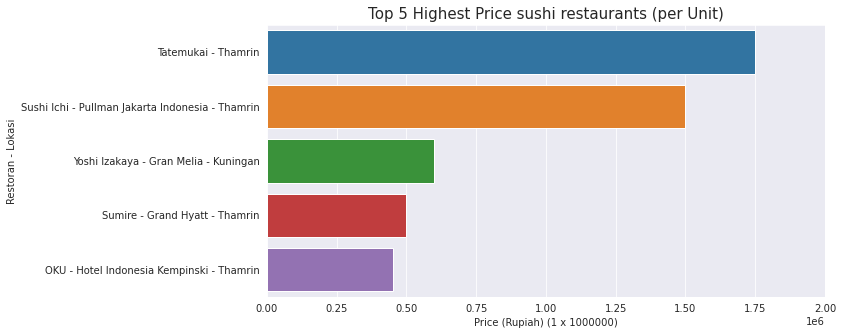

In [15]:
data3 = sushi_star_new.sort_values(by='rest_cost', ascending=False)
data3_top5 = data3.head(5)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(ax=ax, data = data3_top5, x=data3_top5['rest_cost'], y=data3_top5['loc_area'])
ax.set_xlim([0,2000000])
plt.title('Top 5 Highest Price sushi restaurants (per Unit)', fontsize=15)
plt.ylabel('Restoran - Lokasi', fontsize =10 )
plt.xlabel('Price (Rupiah) (1 x 1000000)')

## Correlation Price and Rating

Text(0.5, 0, 'Price')

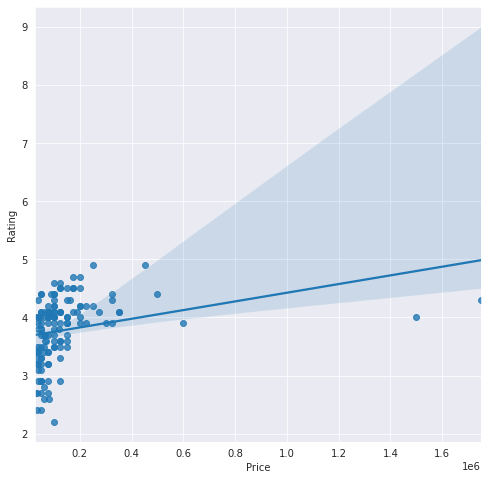

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(x=sushi_star_new['rest_cost'], y=sushi_star_new['rating'], ax=ax)
ax.set_ylabel('Rating')
ax.set_xlabel('Price')